In [2]:
## Importing necessary liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Reading the dataset
data=pd.read_csv('titanic_train.csv')
##saving a copy of the original dataset
data_copy=data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning & EDA

In [4]:
data.shape

(891, 12)

- dataset has 891 rows and 12 columns
- will drop 'PassengerId', 'Name', 'Ticket' columns as these features will be unique to each passengers and will not help in predicting the target variable
- Sibsp=count of siblings & spouse
- Parch=count of parents & child

In [5]:
data=data.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
data.shape

(891, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- now we have 8 features and 'Survived' is our target.
- 5 features have numeric data and 3 have object type data.
- 'Age', 'Cabin' and 'Embarked' have missing values

In [7]:
## confirming the missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- 'Age' has 177 missing values
- 'Cabin' has '687' missing values which means about 77% data is missing. we may have to drop this column as too much data is missing.
- 'Embarked' has only 2 values missing

In [8]:
## Dropping 'Cabin' features based on the above observations
data=data.drop('Cabin',axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
## Checking and visualising the class frequencies in our target variable
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

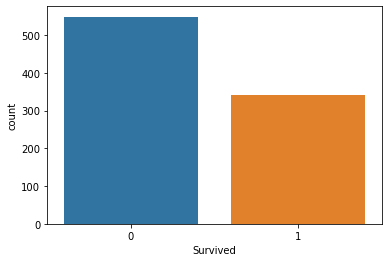

In [10]:
sns.countplot(data['Survived'])

- Number of passengers who survived = 549
- Number of passengers who did not survive = 342
- Difference in frequency of classes if not too large, hence we can consider this dataset to be farely balanced.


### Missing value imputation

In [11]:
## Replacing missing values in 'Embarked' by its 'Mode' which is 'S'
data['Embarked'].replace(np.nan,'S',inplace=True)

In [12]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
## Replacing missing values in 'Age' by its median
data['Age'].fillna(data['Age'].median(),inplace=True)

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Successfully imputed all the missing values

### Encoding the catagorical features 'Sex' and 'Embarked'

In [15]:
## Checking unique classes and their frequencies in catagorical columns

data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
## encoding 'Embarked' feature
embarked=pd.get_dummies(data['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
## Encoding 'Sex' feature
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
## Concating the 'data', 'age' and 'embarked' dataframes
data=pd.concat([data,sex,embarked],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [20]:
## Dropping the 'Sex' and 'Embarked' columns
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


- All the columns now have numeric data

In [22]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


### Checking the distributions and skewness in continuous variables

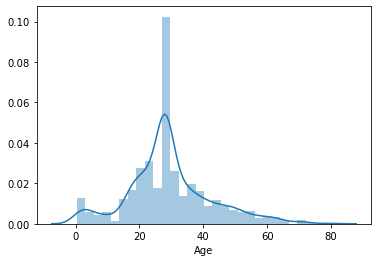

In [23]:
sns.distplot(data['Age'])

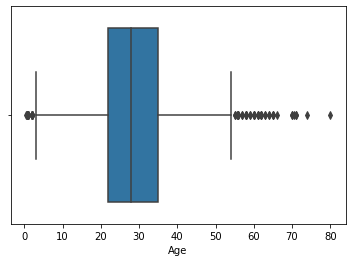

In [24]:
sns.boxplot(data['Age'])

In [25]:
data['Age'].skew()

0.5102446555756495

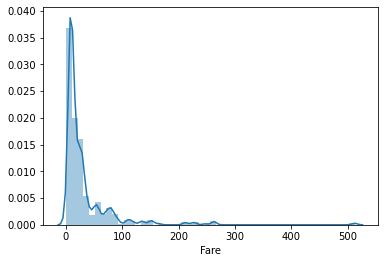

In [26]:
sns.distplot(data['Fare'])

In [27]:
data['Fare'].skew()

4.787316519674893

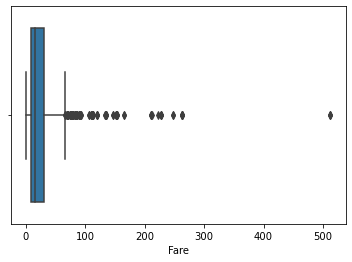

In [28]:
sns.boxplot(data['Fare'])

- 'Age' is normally distributed and has max value of 80. Age entries upto years 80 cannot be considered as outliers as it is very much possible for humans to have age of 80years.
- 'Fare' is highly skewed and also has outliers

In [29]:
# rejecting data beyond 3 std to manage skewness and outliers
from scipy.stats import zscore

z_score=zscore(data[['Fare']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

data.shape

(871, 9)

In [30]:
((891-864)/891)*100

3.0303030303030303

We are losing only 3% data which is acceptable

In [31]:
data['Fare'].skew()

2.250998592424474

In [32]:
## Applying square root transformation to reduce skewness in 'Fare'
data['Fare']=np.sqrt(data['Fare'])
data['Fare'].skew()

1.2451958691941998

In [33]:
data.corr()['Survived']

Survived    1.000000
Pclass     -0.329285
Age        -0.067397
SibSp      -0.040547
Parch       0.080408
Fare        0.319761
male       -0.534088
Q           0.008376
S          -0.140553
Name: Survived, dtype: float64

### Seperating features and the target

In [34]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

### Checking the relationship of continuous features with the target

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [45]:
selectbest=SelectKBest(score_func=f_classif,k=2)
selectbest.fit(X[['Age','Fare']],y)

SelectKBest(k=2)

In [46]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(X[['Age','Fare']].columns)

In [47]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(11,'Scores')

,Features,Scores
1,Fare,98.972567
0,Age,3.965337


- 'Fare' shows stronger relation sheep with target than the 'Age'

### Checking the relationship of catagorical features with the target

In [50]:
cat_feat=X[['Pclass','SibSp','Parch','male','Q','S']]

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
selectbest=SelectKBest(score_func=chi2,k=6)
selectbest.fit(cat_feat,y)

SelectKBest(k=6, score_func=<function chi2 at 0x00000268CEA43160>)

In [54]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(cat_feat.columns)

In [55]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(8,'Scores')

,Features,Scores
3,male,86.145628
0,Pclass,27.218996
2,Parch,9.641685
5,S,4.602968
1,SibSp,3.351260
4,Q,0.055700


- 'male' (gender) and 'Pclass' shows stronger relation with the target than the other catagorical features

### Scaling the features

In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## Splitting the data in training and testing sets

In [146]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

#### Importing classification metrics

In [222]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

## Model 1: Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [153]:
lr.fit(X_train,y_train)

LogisticRegression()

In [154]:
lr.score(X_test,y_test)

0.7752293577981652

In [156]:
y_lr=lr.predict(X_test)

In [157]:
lr_score=accuracy_score(y_test,y_lr)
lr_score

0.7752293577981652

In [158]:
lr_cvs=cross_val_score(lr,X_scaled,y,cv=5).mean()
lr_cvs

0.7864433497536946

In [159]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       124
           1       0.74      0.74      0.74        94

    accuracy                           0.78       218
   macro avg       0.77      0.77      0.77       218
weighted avg       0.78      0.78      0.78       218



In [160]:
print(confusion_matrix(y_test,y_lr))

[[99 25]
 [24 70]]


## Model 2: SVC

In [161]:
from sklearn.svm import SVC
svc=SVC()

In [162]:
svc.fit(X_train,y_train)

SVC()

In [163]:
svc.score(X_test,y_test)

0.7981651376146789

In [164]:
y_svc=svc.predict(X_test)

In [165]:
svc_score=accuracy_score(y_test,y_svc)
svc_score

0.7981651376146789

In [166]:
svc_cvs=cross_val_score(svc,X_scaled,y,cv=5).mean()
svc_cvs

0.8266206896551724

In [167]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       124
           1       0.86      0.64      0.73        94

    accuracy                           0.80       218
   macro avg       0.81      0.78      0.78       218
weighted avg       0.81      0.80      0.79       218



In [168]:
print(confusion_matrix(y_test,y_svc))

[[114  10]
 [ 34  60]]


## Model 3: KNN

In [187]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [188]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [189]:
knn.score(X_test,y_test)

0.7706422018348624

In [190]:
y_knn=knn.predict(X_test)

In [191]:
knn_score=accuracy_score(y_test,y_knn)
knn_score

0.7706422018348624

In [192]:
knn_cvs=cross_val_score(knn,X_scaled,y,cv=5).mean()
knn_cvs

0.8140098522167486

In [193]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       124
           1       0.73      0.73      0.73        94

    accuracy                           0.77       218
   macro avg       0.77      0.77      0.77       218
weighted avg       0.77      0.77      0.77       218



In [194]:
print(confusion_matrix(y_test,y_knn))

[[99 25]
 [25 69]]


## Model 4: Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [196]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [197]:
dt.score(X_test,y_test)

0.7385321100917431

In [198]:
y_dt=dt.predict(X_test)

In [199]:
dt_score=accuracy_score(y_test,y_dt)
dt_score

0.7385321100917431

In [200]:
dt_cvs=cross_val_score(dt,X_scaled,y,cv=5).mean()
dt_cvs

0.7796190476190477

In [201]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       124
           1       0.69      0.70      0.70        94

    accuracy                           0.74       218
   macro avg       0.73      0.73      0.73       218
weighted avg       0.74      0.74      0.74       218



In [202]:
print(confusion_matrix(y_test,y_dt))

[[95 29]
 [28 66]]


## Model 5: Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [204]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [205]:
rf.score(X_test,y_test)

0.7935779816513762

In [206]:
y_rf=rf.predict(X_test)

In [208]:
rf_score=accuracy_score(y_test,y_rf)
rf_score

0.7935779816513762

In [209]:
rf_cvs=cross_val_score(rf,X_scaled,y,cv=5).mean()
rf_cvs

0.8174646962233169

In [210]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       124
           1       0.76      0.76      0.76        94

    accuracy                           0.79       218
   macro avg       0.79      0.79      0.79       218
weighted avg       0.79      0.79      0.79       218



In [212]:
print(confusion_matrix(y_test,y_rf))

[[102  22]
 [ 23  71]]


## Model 6: Gradient Boosting Classifier

In [213]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [214]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [215]:
gbc.score(X_test,y_test)

0.7660550458715596

In [216]:
y_gbc=gbc.predict(X_test)

In [217]:
gbc_score=accuracy_score(y_test,y_gbc)

In [218]:
gbc_cvs=cross_val_score(gbc,X_scaled,y,cv=5).mean()
gbc_cvs

0.8140229885057473

In [219]:
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       124
           1       0.78      0.64      0.70        94

    accuracy                           0.77       218
   macro avg       0.77      0.75      0.75       218
weighted avg       0.77      0.77      0.76       218



In [221]:
print(confusion_matrix(y_test,y_gbc))

[[107  17]
 [ 34  60]]


## ROC_AUC_Curve

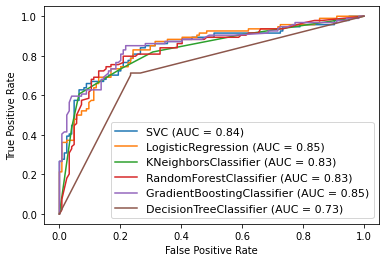

In [223]:
disp=plot_roc_curve(svc,X_test,y_test)

plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

In [225]:
print('gbc_cvs=',gbc_cvs)
print('lr_cvs=',lr_cvs)

gbc_cvs= 0.8140229885057473
lr_cvs= 0.7864433497536946


**Based on the AUC and Cross validation scores, Gradient Boosting Classifier is our best model.**

### Tuning the hyperparameters for the GBC

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
gbc_grid={'max_depth':range(3,12,3),
          'learning_rate': np.arange(0.1,1,0.1),
          'min_samples_split':range(2,8,2),
         'n_estimators':[60,80,100,120]}

In [228]:
gridCV=GridSearchCV(gbc,param_grid=gbc_grid,n_jobs=-1)

In [229]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 3),
                         'min_samples_split': range(2, 8, 2),
                         'n_estimators': [60, 80, 100, 120]})

In [230]:
gridCV.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [231]:
gbc_best=GradientBoostingClassifier(learning_rate=0.2,max_depth=3,min_samples_split=4,n_estimators=100)

In [232]:
gbc_best.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=4)

In [233]:
gbc_best.score(X_test,y_test)

0.7935779816513762

In [234]:
y_best=gbc_best.predict(X_test)

In [235]:
best_cvs=cross_val_score(gbc_best,X_scaled,y,cv=7).mean()
best_cvs

0.8289493087557603

In [236]:
print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       124
           1       0.80      0.69      0.74        94

    accuracy                           0.79       218
   macro avg       0.80      0.78      0.79       218
weighted avg       0.79      0.79      0.79       218



In [237]:
print(confusion_matrix(y_test,y_best))

[[108  16]
 [ 29  65]]


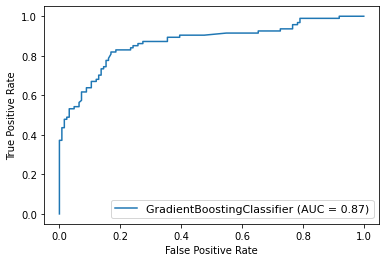

In [238]:
## Plotting the roc_auc_curve for best model
disp=plot_roc_curve(gbc_best,X_test,y_test)

plt.legend(prop={'size':11},loc='lower right')

## Saving our best model

In [239]:
import pickle
filename='Titanic_GBC.pkl'
pickle.dump(gbc_best,open(filename,'wb'))